# Project work, part 1 - Dashboard basics

## Project Links

**Github Repository:** https://github.com/fayomitz/IND320-fayomitz  
**Streamlit app:** https://ind320-fayomitz.streamlit.app/

## AI Usage

Throughout this project, AI assistance (GitHub Copilot) was utilized in several key areas:

- **Code Structure & Layout**: Designing the combined multi-variable plot with multiple y-axes and color-coded wind direction visualization
- **Code Completion**: Inline suggestions for simple operations and methods
- **Documentation**: Writing detailed code comments explaining the purpose and functionality of each section, including technical details about normalization, color mapping, and subplot configuration
- **Code Formatting**: Ensuring consistent code style
- **Streamlit Development**: Assistance with writing user-friendly text descriptions and documentation for the Streamlit dashboard application

AI tools significantly improved code readability, documentation quality, and development efficiency while maintaining full understanding and control of the implementation.

## Work Log
In this first assignment I set up the foundation for the IND320 project by creating both a Jupyter Notebook and a Streamlit app connected to the same dataset (`open-meteo-subset.csv`). The work consisted of preparing accounts, loading and processing data, creating visualizations, and documenting the workflow.

### Jupyter Notebook
I started by preparing a Jupyter Notebook (`main.ipynb`) as the main documentation and development platform. The notebook imports the CSV file using Pandas, prints the content in a structured way, and produces plots for each variable separately. I also created a combined plot of all variables, where I had to account for different scales across columns. To handle this, I used multiple y-axes and adjusted the formatting so that precipitation and wind variables could be compared without one variable dominating the scale. All code cells include explanatory comments to ensure reproducibility.

### Streamlit App
The app was structured into three working pages, following the assignment requirements.  

1. **Home Page (`streamlit_app.py`)**  
   Introduces the project, explains the purpose, and shows dataset information such as total records, date range, and number of variables. Metrics are calculated directly from the cached dataset.  

2. **Data Table (`2_Data_Table.py`)**  
   Displays the dataset in an interactive table with summary statistics (mean, standard deviation, min, max) for each variable. For every variable, a line chart column shows the first month of data. This gives a quick overview of trends without requiring manual plotting.  

3. **Interactive Plot (`3_Interactive_Plot.py`)**  
   Provides a customizable plot where the user can select a specific variable or display all variables together. A drop-down menu controls the variable choice, while a selection slider controls the month(s) shown. Matplotlib was used for plotting inside Streamlit, and additional summary statistics are displayed below the figure.

4. **Placeholder Page (`4_Placeholder_Page.py`)**

Caching (`@st.cache_data`) was implemented in all pages to improve performance when reloading data as requested in the assignment.

---

## 1. Data Loading and Exploration

This section loads the weather data from CSV and performs initial exploratory data analysis (EDA) to understand the dataset structure, data types, and data quality.

In [57]:
### Import Required Libraries ###

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize  # For normalizing wind direction to color scale
from matplotlib.cm import ScalarMappable  # For creating color bars

In [58]:
### Load Weather Data from CSV ###

# Load the weather dataset from Open-Meteo API
# Expected columns: time, temperature_2m (°C), precipitation (mm), wind_speed_10m (m/s), wind_direction_10m (°), wind_gusts_10m (m/s)
df = pd.read_csv("open-meteo-subset.csv")

# Display dataset dimensions
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")

# List all columns with their data types
print("\nColumns:")
for col in df.columns:
    print(f" - {col} ({df[col].dtype})")

# Check for missing values to assess data quality
print("\nMissing values per column:")
print(df.isna().sum())

# Preview first few rows
df.head()

# Generate descriptive statistics for all numeric columns
df.describe().T

Shape: 8760 rows x 6 columns

Columns:
 - time (object)
 - temperature_2m (°C) (float64)
 - precipitation (mm) (float64)
 - wind_speed_10m (m/s) (float64)
 - wind_gusts_10m (m/s) (float64)
 - wind_direction_10m (°) (int64)

Missing values per column:
time                      0
temperature_2m (°C)       0
precipitation (mm)        0
wind_speed_10m (m/s)      0
wind_gusts_10m (m/s)      0
wind_direction_10m (°)    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),8760.0,-0.394909,6.711903,-19.3,-4.9,-1.0,4.1,19.9
precipitation (mm),8760.0,0.222854,0.493747,0.0,0.0,0.0,0.2,5.8
wind_speed_10m (m/s),8760.0,3.661689,2.253210,0.1,1.8,3.3,5.1,13.6
wind_gusts_10m (m/s),8760.0,8.300719,5.098909,0.2,4.5,7.7,11.5,28.7
wind_direction_10m (°),8760.0,212.209589,91.371980,0.0,128.0,238.0,292.0,360.0


---

## 2. Data Preprocessing

Prepare the dataset for time-series visualization by converting time strings to datetime objects and setting up the time index.

In [59]:
### Prepare Time-Series DataFrame ###

# Convert 'time' column from string to datetime objects for proper time-series handling
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index to enable time-series plotting and operations
df = df.set_index('time')

# Extract list of all numeric columns for plotting
# This automatically excludes any non-numeric columns that may exist
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Display the numeric columns that will be available for visualization
numeric_columns

['temperature_2m (°C)',
 'precipitation (mm)',
 'wind_speed_10m (m/s)',
 'wind_gusts_10m (m/s)',
 'wind_direction_10m (°)']

---

## 3. Data Visualization

### 3.1 Individual Time-Series Plots

Create separate subplots for each weather variable to examine individual trends and patterns over time.

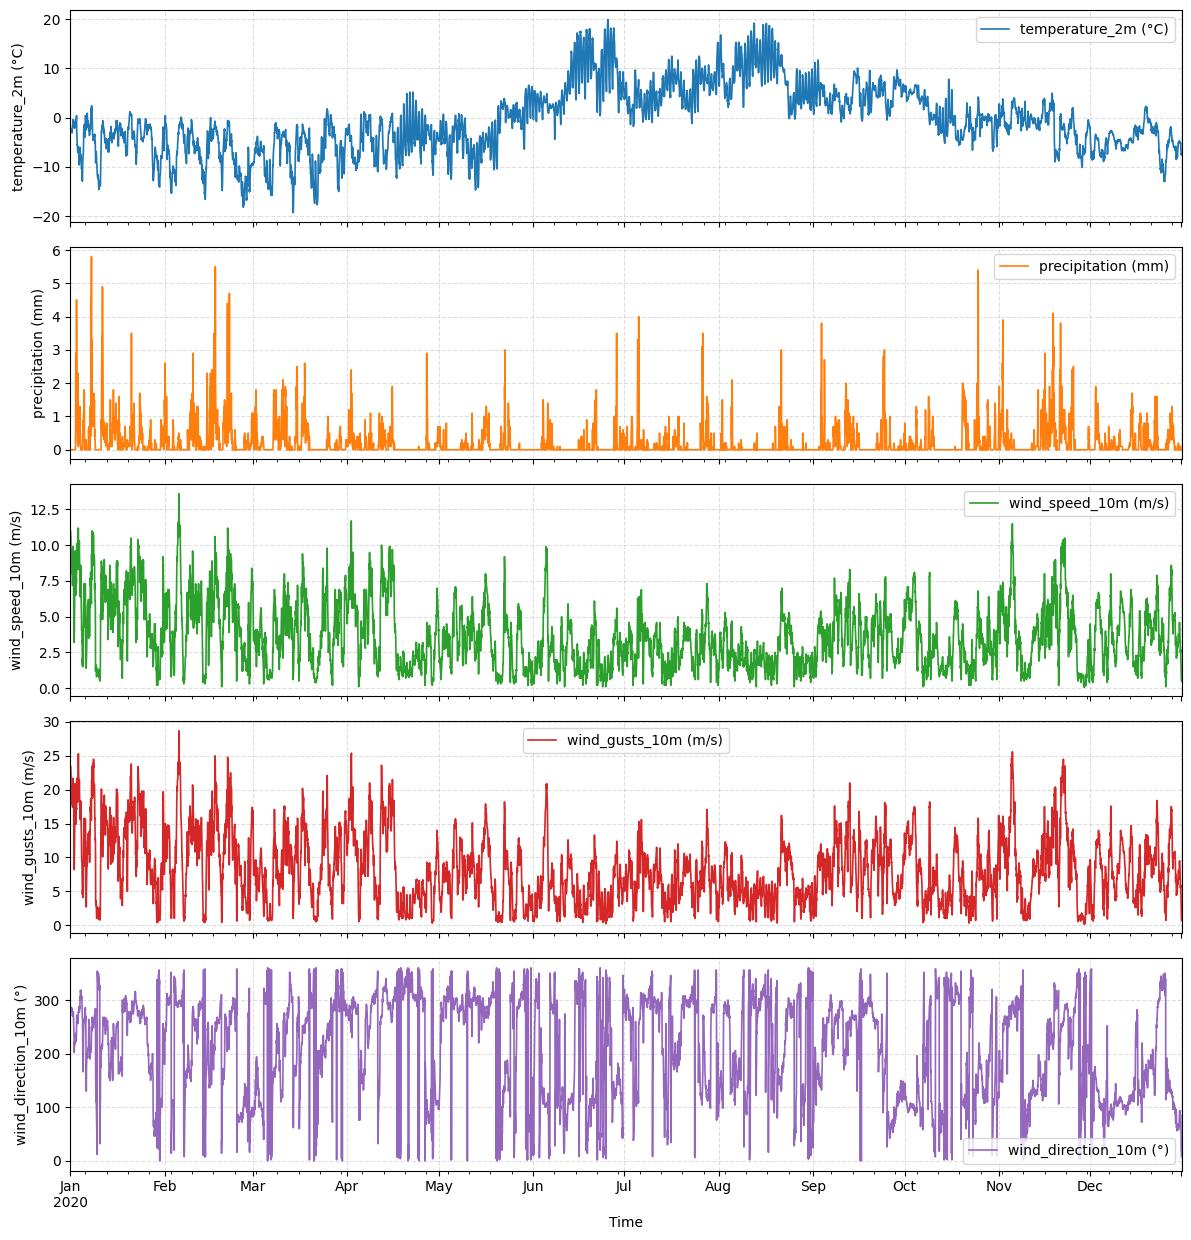

In [60]:
### Plot Each Weather Variable Separately ###

# Create a grid of subplots - one for each numeric column
# Figure height scales with number of variables (2.5 inches per subplot)
axes = df[numeric_columns].plot(
    subplots=True,  # Create separate subplot for each column
    figsize=(12, 2.5 * len(numeric_columns)),  # Dynamic figure size
    linewidth=1.2,  # Line thickness
    sharex=True  # Share x-axis across all subplots for easier comparison
)

# Customize each subplot
for ax, column in zip(axes.flatten(), numeric_columns):
    ax.set_ylabel(column)  # Label y-axis with the column name (includes units)
    ax.grid(True, linestyle='--', alpha=0.4)  # Add grid for readability
    ax.set_xlabel("Time")  # Label x-axis

# Adjust spacing between subplots to prevent overlap
plt.tight_layout()

---

### 3.2 Combined Multi-Variable Plot

Create a comprehensive visualization showing temperature, precipitation, wind speed, and wind direction on a single plot using multiple y-axes and color encoding.

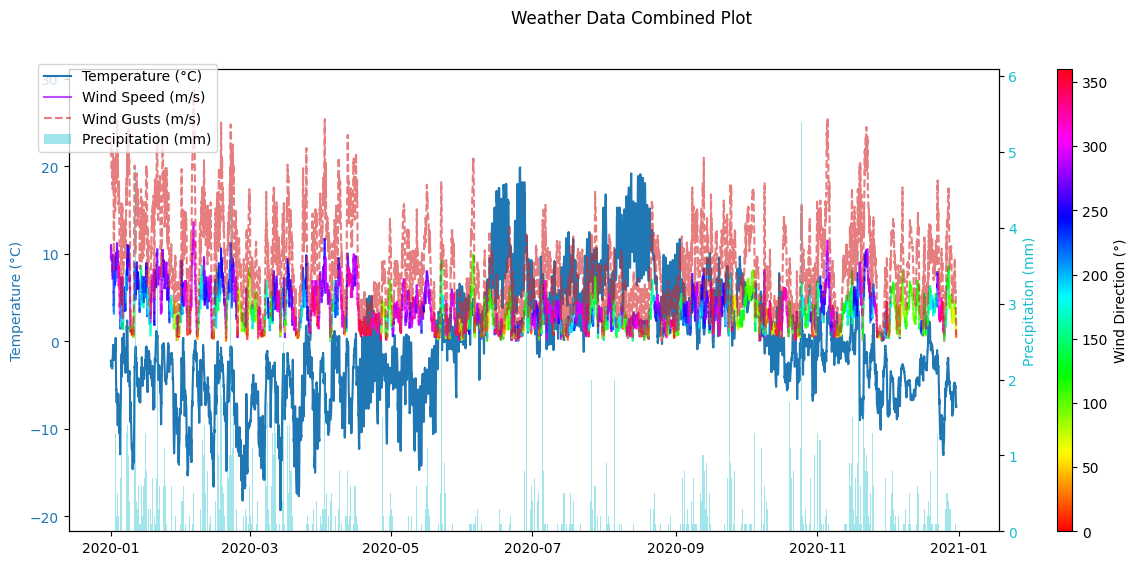

In [61]:
### Create Integrated Weather Visualization ###

# Initialize figure with large dimensions for clarity
fig, ax1 = plt.subplots(figsize=(15, 6))

## Layer 1: Temperature (Primary Y-Axis) ##
# Plot temperature as a blue line on the left y-axis
ax1.plot(df.index, df["temperature_2m (°C)"], 
         color="tab:blue", label="Temperature (°C)")
ax1.set_ylabel("Temperature (°C)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

## Layer 2: Precipitation (Secondary Y-Axis) ##
# Create a second y-axis on the right for precipitation
ax2 = ax1.twinx()
# Display precipitation as bars with narrow width for hourly data
ax2.bar(df.index, df["precipitation (mm)"], 
        width=1/24,  # Width = 1 hour when x-axis is in days
        color="tab:cyan", alpha=0.4, label="Precipitation (mm)")
ax2.set_ylabel("Precipitation (mm)", color="tab:cyan")
ax2.tick_params(axis="y", labelcolor="tab:cyan")

## Layer 3: Wind Speed with Direction Color Coding ##
# Set up color mapping for wind direction (0-360 degrees)
norm = Normalize(vmin=0, vmax=360)  # Normalize degrees to [0, 1] range
cmap = plt.cm.hsv  # Use HSV colormap (full color wheel for directions)

# Plot wind speed as segments colored by wind direction
# Loop through consecutive time points to create colored line segments
for i in range(len(df) - 1):
    # Plot line segment between consecutive points
    ax1.plot(df.index[i:i+2], df["wind_speed_10m (m/s)"].iloc[i:i+2], 
             color=cmap(norm(df['wind_direction_10m (°)'].iloc[i])),  # Color by direction
             linewidth=1.5, alpha=0.7, 
             label="Wind Speed (m/s)" if i == 0 else "")  # Label only first segment

## Layer 4: Wind Gusts ##
# Overlay wind gusts as a dashed red line to show peak wind conditions
ax1.plot(df.index, df["wind_gusts_10m (m/s)"], 
         color="tab:red", alpha=0.6, linestyle="--", 
         label="Wind Gusts (m/s)")

## Add Colorbar for Wind Direction Reference ##
# Create a colorbar to interpret wind direction colors
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar creation
cbar = plt.colorbar(sm, ax=ax1, pad=0.05, aspect=30)
cbar.set_label('Wind Direction (°)', fontsize=10)

## Final Layout Adjustments ##
# Add legend showing all variables
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
# Add descriptive title
fig.suptitle("Weather Data Combined Plot")
# Display the plot
plt.show()